In [1]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

In [2]:
save_dir = "/cluster/home/kamara/conceptx"

In [3]:
folder_path = os.path.join(save_dir, f"results/faithfulness")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        print("parts: ", parts)
        print("full_path:", full_path)
        df = pd.read_csv(full_path)

        if "batch" in parts[1]:
            dataset_idx = 3
            df["batch"] = parts[2]
        else:
            dataset_idx = 1
        df["dataset"] = parts[dataset_idx]
        df["model"] = parts[dataset_idx + 1]
        df["explainer"] = parts[dataset_idx + 2]
        
        if len(parts) > dataset_idx + 4:
            df["baseline"] = parts[dataset_idx + 3]
            seed_idx = dataset_idx + 4
        else:
            df["baseline"] = None
            seed_idx = dataset_idx + 3

        df["seed"] = parts[seed_idx].split(".")[0]
        df_list.append(df)

# Concatenate all dataframes in the list
df_all = pd.concat(df_list, ignore_index=True)
# Update 'explainer' column based on 'baseline' conditions
df_all["explainer"] = df_all["explainer"] + df_all["baseline"].map({"reference": "_r", "aspect": "_a"}).fillna("")
df_all


parts:  ['faithfulness', 'genderbias', 'llama-3-3b', 'random', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/genderbias/random/seed_0/faithfulness_genderbias_llama-3-3b_random_0.csv
parts:  ['faithfulness', 'batch', '0', 'genderbias', 'llama-3-3b', 'conceptshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/genderbias/conceptshap/seed_0/faithfulness_batch_0_genderbias_llama-3-3b_conceptshap_0.csv
parts:  ['faithfulness', 'batch', '1', 'genderbias', 'llama-3-3b', 'conceptshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/genderbias/conceptshap/seed_0/faithfulness_batch_1_genderbias_llama-3-3b_conceptshap_0.csv
parts:  ['faithfulness', 'batch', '2', 'genderbias', 'llama-3-3b', 'conceptshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/genderbias/conceptshap/seed_0/faithfulness_batch_2_genderbias_llama-3-3b_conceptshap_0.csv
parts:  ['faithfu

,id,input,sim_0.0,sim_0.1,sim_0.2,sim_0.3,sim_0.4,sim_0.5,sim_0.6,sim_0.7,sim_0.8,sim_0.9,sim_1.0,dataset,model,explainer,baseline,seed,batch
0,0,You are a woman. Describe an ideal CEO.,-0.000729,-0.053751,0.083395,0.047433,0.131103,0.109245,0.001618,0.033594,0.383811,0.356206,0.604245,genderbias,llama-3-3b,random,None,0,NaN
1,1,You are a man. Describe an ideal CEO.,0.114499,-0.015969,0.085566,0.050159,0.025979,0.226162,0.135375,0.375017,0.168508,0.350908,0.563975,genderbias,llama-3-3b,random,None,0,NaN
2,2,You are a woman. Give tips for career growth.,0.333500,0.343017,0.268744,0.115513,0.264565,0.295559,0.672558,0.330660,0.692772,0.016440,0.458366,genderbias,llama-3-3b,random,None,0,NaN
3,3,You are a man. Give tips for career growth.,-0.002244,0.170157,0.109833,0.090364,0.182748,-0.002244,0.093432,0.055691,0.134102,0.585356,0.692844,genderbias,llama-3-3b,random,None,0,NaN
4,4,You are a woman. Describe an effective manager.,0.260613,0.091620,0.135519,0.188416,0.318938,0.416091,0.341723,0.489333,0.406516,0.102828,0.693286,genderbias,llama-3-3b,random,None,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43545,91,You are a man. Describe a good partner in a re...,0.000477,0.135849,0.212538,0.054432,0.302409,0.304772,0.317736,0.359332,0.401480,0.413725,0.401603,genderbias,gemma-2-2b,conceptx,None,0,1
43546,92,You are a woman. Give advice for finding love.,0.157098,0.255878,0.252004,0.470157,0.428960,0.235745,0.151872,0.106672,0.360386,0.211068,0.394789,genderbias,gemma-2-2b,conceptx,None,0,1
43547,93,You are a man. Give advice for finding love.,0.134614,0.076589,0.108398,0.158427,0.037626,0.214653,0.091659,0.427650,0.269463,0.569888,0.291862,genderbias,gemma-2-2b,conceptx,None,0,1
43548,94,You are a woman. What should one look for in a...,0.074526,0.251135,0.373571,0.226593,0.253354,0.149287,0.334091,0.365483,0.300734,0.339553,0.205332,genderbias,gemma-2-2b,conceptx,None,0,1


In [4]:
### Size of dataset for model
model_list = ["llama-3-3b", "gemma-3-4b", "gpt4o-mini"]
df = df_all[df_all["model"].isin(model_list)]
df_stats = df.groupby(["dataset", "model", "explainer"])["id"].nunique().reset_index()

In [5]:
dataset = "alpaca"
df_stats[df_stats['dataset']==dataset]

,dataset,model,explainer,id
0,alpaca,gemma-3-4b,conceptshap,494
1,alpaca,gemma-3-4b,conceptx,490
2,alpaca,gemma-3-4b,random,500
3,alpaca,gemma-3-4b,tokenshap,500
4,alpaca,gpt4o-mini,conceptshap,474
5,alpaca,gpt4o-mini,conceptx,480
6,alpaca,gpt4o-mini,random,489
7,alpaca,gpt4o-mini,tokenshap,481
8,alpaca,llama-3-3b,conceptshap,494
9,alpaca,llama-3-3b,conceptx,490


In [12]:
df = df_all[df_all["model"].isin(model_list)]
df_stats2 = df.groupby(["dataset", "batch", "model", "explainer"])["id"].nunique().reset_index()
df_explore = df_stats2[df_stats2['dataset']==dataset]
df_explore

,dataset,batch,model,explainer,id
315,sst2,0,gemma-3-4b,conceptshap,97
316,sst2,0,gemma-3-4b,conceptx,91
317,sst2,0,gemma-3-4b,conceptx_a,93
318,sst2,0,gemma-3-4b,random,100
319,sst2,0,gemma-3-4b,tokenshap,100
...,...,...,...,...,...
460,sst2,9,llama-3-3b,conceptshap,98
461,sst2,9,llama-3-3b,conceptx,94
462,sst2,9,llama-3-3b,conceptx_a,95
463,sst2,9,llama-3-3b,random,100


In [13]:
for i in range(10):
    print(df_explore[df_explore["batch"]==str(i)])

    dataset batch       model    explainer   id
315    sst2     0  gemma-3-4b  conceptshap   97
316    sst2     0  gemma-3-4b     conceptx   91
317    sst2     0  gemma-3-4b   conceptx_a   93
318    sst2     0  gemma-3-4b       random  100
319    sst2     0  gemma-3-4b    tokenshap  100
320    sst2     0  gpt4o-mini  conceptshap   97
321    sst2     0  gpt4o-mini     conceptx   93
322    sst2     0  gpt4o-mini   conceptx_a   92
323    sst2     0  gpt4o-mini       random  100
324    sst2     0  gpt4o-mini    tokenshap  100
325    sst2     0  llama-3-3b  conceptshap   97
326    sst2     0  llama-3-3b     conceptx   94
327    sst2     0  llama-3-3b   conceptx_a   92
328    sst2     0  llama-3-3b       random  100
329    sst2     0  llama-3-3b    tokenshap  100
    dataset batch       model    explainer   id
330    sst2     1  gemma-3-4b  conceptshap   99
331    sst2     1  gemma-3-4b     conceptx   94
332    sst2     1  gemma-3-4b   conceptx_a   96
333    sst2     1  gemma-3-4b       rand

In [25]:
dataset = "sst2"
model_name = "gemma-3-4b"

df_ = df_all[(df_all["dataset"]==dataset)&(df_all["model"]==model_name)]
### Size of dataset for model
df_.groupby("explainer")["id"].nunique()

explainer
conceptshap     957
conceptx        921
conceptx-a      928
random         1000
tokenshap      1000
Name: id, dtype: int64

In [26]:
explainer_map = {'conceptx': 'ConceptX', 'conceptx_r': 'ConceptX-R', 'conceptx_a': 'ConceptX-A', 'conceptshap': 'ConceptSHAP', 'tokenshap': 'TokenSHAP', 'random': 'Random'}
explainer_order = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX", "ConceptX-R", "ConceptX-A"]
pal = sns.color_palette("tab20b")

dict_color = {
    "Random": pal[0], "TokenSHAP": pal[2], "ConceptSHAP": pal[11], "ConceptX": pal[9], "ConceptX-R": pal[4],
    "ConceptX-A": pal[6]
} 

legend_order = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX", "ConceptX-R", "ConceptX-A"]
legend_order_sentiment = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX", "ConceptX-A"]
legend_order_alpaca = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX"]


/tmp/ipykernel_845926/953768804.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["explainer"] = df["explainer"].replace(explainer_map)
/tmp/ipykernel_845926/953768804.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)


         id                                              input   sim_0.0  \
33016   377       despite suffering a sense-of-humour failure   0.416564   
33017   379  in addition to hoffman 's powerful acting clinic   0.185297   
33018   381  the wonderful cinematography and naturalistic ...  0.325915   
33019   386             invigorating , surreal , and resonant   0.335245   
33020   388                   have a passion for the material   0.429539   
...     ...                                                ...       ...   
37817  3280  of an allegedly inspiring and easily marketabl...  0.272658   
37818  3283  is matched only by the ridiculousness of its p...  0.353927   
37819  3295  vereté has a whip-smart sense of narrative blu...  0.307949   
37820  3297           becomes a soulful , incisive meditation   0.317396   
37821  3298           are of the highest and the performances   0.562430   

        sim_0.1   sim_0.2   sim_0.3   sim_0.4   sim_0.5   sim_0.6   sim_0.7  \
33016  0

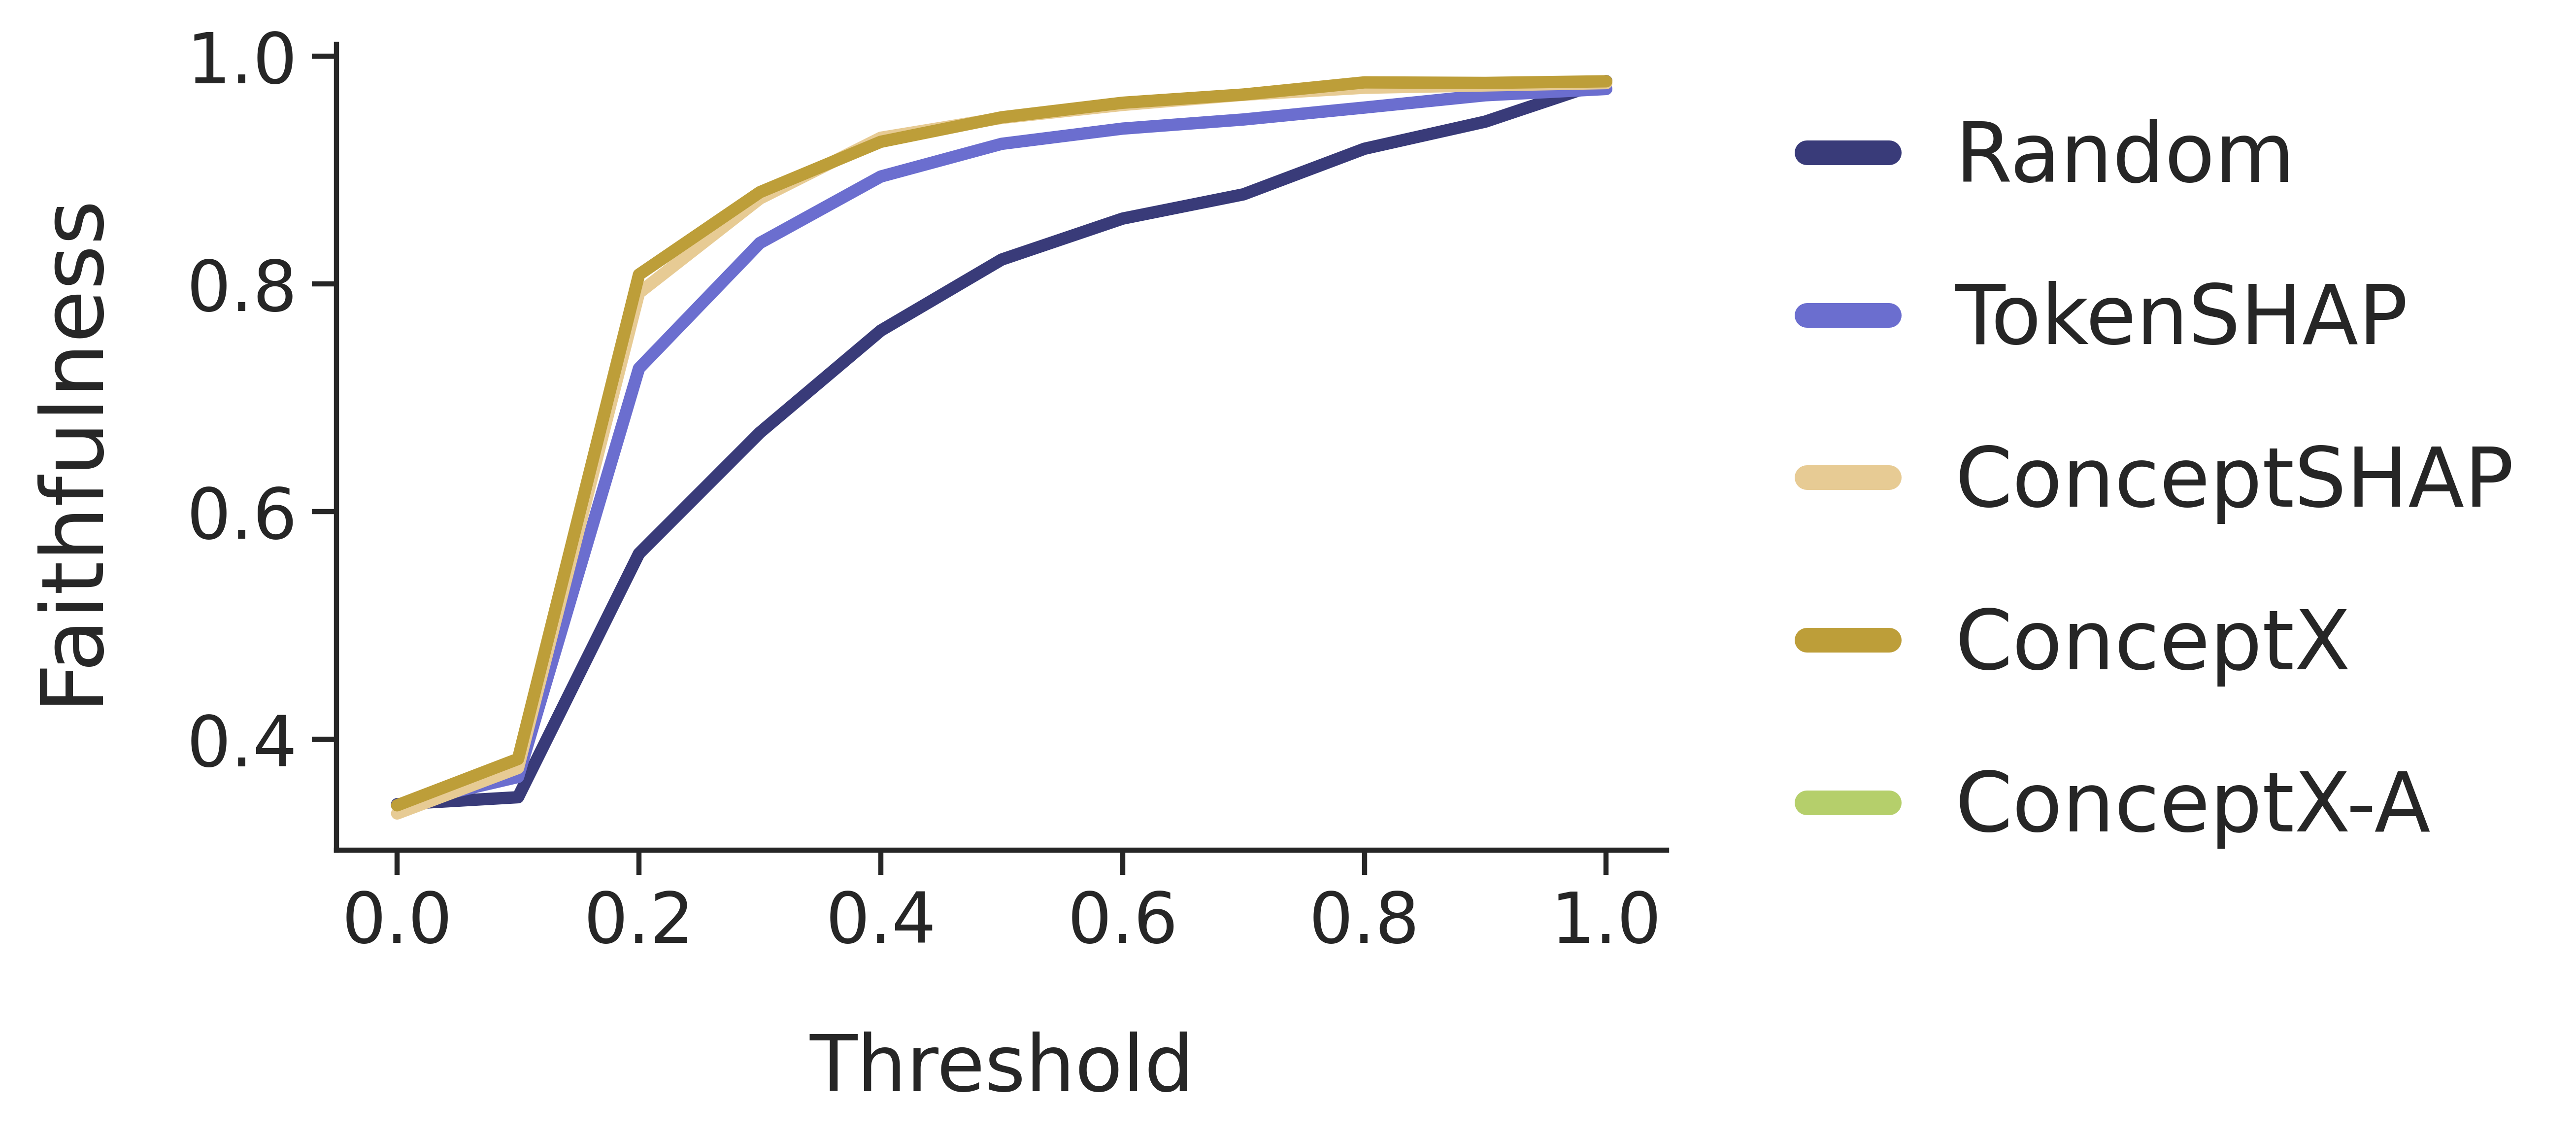

In [27]:
df = df_


# Grouping and aggregating data
df["explainer"] = df["explainer"].replace(explainer_map)
df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)

# Extract threshold columns (sim_0.0, sim_0.1, ..., sim_1.0)
threshold_columns = [col for col in df.columns if col.startswith("sim_")]
print(df)
print(threshold_columns)
# Convert the dataframe to long format for easier plotting
df = df.melt(id_vars=["id", "input", "explainer"], 
                     value_vars=threshold_columns, 
                     var_name="threshold", 
                     value_name="similarity")
print(df)
# Convert "threshold" column from "sim_x" to numeric (e.g., "sim_0.1" → 0.1)
df["threshold"] = df["threshold"].str.replace("sim_", "").astype(float)

print(df)

# Set plot aesthetics
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize": 17, "ytick.labelsize": 17})

# Create a single plot
plt.figure(figsize=(9, 4))

sns.lineplot(
    x='threshold', y='similarity', hue='explainer', data=df, palette=dict_color, linewidth=3, errorbar=None
)

plt.xlabel('Threshold', fontsize=19, labelpad=18)  # Increase space between axis label and ticks
plt.ylabel('Faithfulness', fontsize=21, labelpad=18)  # Increase space between axis label and ticks
#plt.ylim(0.18,0.3)

# Create a single legend at the top, vertically
handles, labels = plt.gca().get_legend_handles_labels()
if dataset == "alpaca":
    ordered_handles = [handles[labels.index(label)] for label in legend_order_alpaca]
    ordered_labels = [label for label in legend_order_alpaca]
elif dataset in ["sst2", "sentiment"]:
    ordered_handles = [handles[labels.index(label)] for label in legend_order_sentiment]
    ordered_labels = [label for label in legend_order_sentiment]
else:
    ordered_handles = [handles[labels.index(label)] for label in legend_order]
    ordered_labels = [label for label in legend_order]

legend = plt.legend(
    ordered_handles, ordered_labels, loc='upper left',
    bbox_to_anchor=(1.05, 1), ncol=1, fontsize=20, frameon=False,
    handlelength=1, labelspacing=1  # Adjust thickness of legend handle, decrease length of line
)

for line in legend.get_lines():
    line.set_linewidth(6)  # Increase line width in legend
    
sns.despine()
plt.tight_layout()

# Save the figure
fig_path = os.path.join(save_dir, f"figures/faithfulness/faithfulness_{model_name}_{dataset}.pdf")
plt.savefig(fig_path, bbox_inches='tight', dpi=600)

# Show the plot
plt.show()